## Check calibration of lab probes ANK1 ANK2 P

Probes ANK1 and ANK2 are fixed under the canyons to measure conductivity at the heads of the canyons.

Probe P is used in the profiler.


Channel order: CH1 - ANK1, CH2 - ANK2, no probe P

We chacked the calibration in situ for ANK1, ANK2, using 4 different salty solutions:

|Sol.|density (g/cm^3)|.mat file|
|:-:|:-:|:-:|
|solution 1|1.00900|salt1.mat|
|solution 2|1.02190|salt1.mat|
|solution 3|1.040592|salt1.mat|
|solution 4|1.01609|salt1.mat|

In [3]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
def dens_ANK1(read):
    '''Calibration from 29 March 2019 in calibration_29mar19.ipynb'''
    rho_1 = 0.997387+0.004844*read+0.000312*read**2+0.000204*read**3 
    return(rho_1)

def dens_ANK2(read):
    '''Calibration  from 29 March 2019 in calibration_29mar19.ipynb '''
    rho_2 = 0.997311+0.006653*read+0.003429*read**2+-0.000041*read**3 # March 29, after knocking off
    #rho_2 = 0.982289+0.041039*read-0.010799*read**2+0.002785*read**3 # March 21st, Ashu's calibration, values are too high
    return(rho_2)


../calibration_check_11Apr19/salt1.mat
../calibration_check_11Apr19/salt2.mat
../calibration_check_11Apr19/salt3.mat
../calibration_check_11Apr19/salt4.mat


Text(0.5,1,'CH2 - ANK2 ')

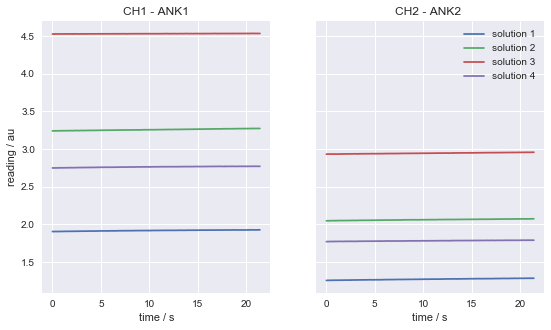

In [9]:
nums = ['1','2','3','4']
file_num = len(nums)
mean_read_ch1 = np.zeros(file_num)
std_read_ch1 = np.zeros(file_num)

mean_read_ch2 = np.zeros(file_num)
std_read_ch2 = np.zeros(file_num)

 
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(9,5), sharey=True)

for num, ii in zip(nums, range(file_num)):
    filepath = '../calibration_check_11Apr19/salt%s.mat' %num
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    ch2 = mat['ch2']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch1[ii] = np.mean(ch1)
    std_read_ch1[ii] = np.std(ch1)
    
    mean_read_ch2[ii] = np.mean(ch2)
    std_read_ch2[ii] = np.std(ch2)
    
    ax0.plot(time,ch1)
    ax1.plot(time,ch2,label='solution %s' %num)
    
ax1.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.set_title('CH1 - ANK1')
ax1.set_title('CH2 - ANK2 ')


In [10]:
sol_density = np.array([1.009,1.0219,1.040592,1.01609])

error (%) ANK1
[0.02602797 0.15893696 0.39562273 0.1338049 ]
error (%) ANK2
[0.22162298 0.32700757 0.4797125  0.36685588]


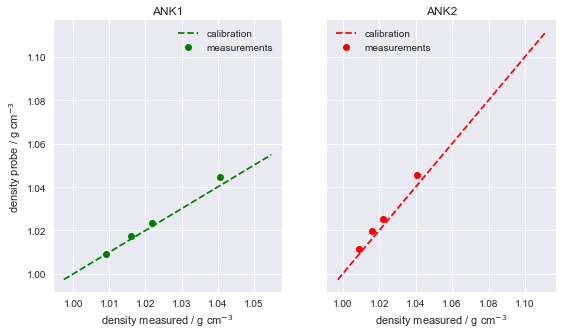

In [23]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(9,5), sharey=True)

read_dummy = np.linspace(0,5,30)

sol_ANK1 = dens_ANK1(mean_read_ch1)
sol_ANK2 = dens_ANK2(mean_read_ch2)

calib_ANK1 = dens_ANK1(read_dummy)
calib_ANK2 = dens_ANK2(read_dummy)

ax0.plot(calib_ANK1,calib_ANK1,'--g', label='calibration')
ax0.plot(sol_density, sol_ANK1,'go', label='measurements')
ax1.plot(calib_ANK2,calib_ANK2,'--r', label='calibration')
ax1.plot(sol_density, sol_ANK2,'ro', label='measurements')

ax0.set_xlabel('density measured / g cm$^{-3}$')
ax0.set_ylabel('density probe / g cm$^{-3}$')
ax1.set_xlabel('density measured / g cm$^{-3}$')
ax0.set_title('ANK1')
ax1.set_title('ANK2')
ax0.legend()
ax1.legend()

d_rho1 = 100*(sol_ANK1-sol_density)/sol_density
d_rho2 = 100*(sol_ANK2-sol_density)/sol_density

print('error (%) ANK1')
print(d_rho1)
print('error (%) ANK2')
print(d_rho2)


Errors are larger for ANK2 but none are larger than 0.5%

